In [44]:
import os
from PIL import Image
import numpy
from matplotlib import pyplot
import keras

In [45]:
class MyImage:
    def __init__(self, image: Image, name: str) -> None:
        self.image = image
        self.name = name

    def show(self):
        self.image.show()

    def getArray(self):
        return numpy.array(self.image)/255

In [46]:
class ImageLoader:
    def __init__(self) -> None:
        dataDir='data'

        storedImage=[]

        dirList = os.listdir(dataDir)
        for dirName in dirList:
            if dirName != "README":
                imageList = dirList = os.listdir(
                    os.path.join(dataDir, dirName))
                for imageName in imageList:
                    tmpImage = MyImage(image=Image.open(
                        os.path.join(dataDir, dirName, imageName)), name=dirName)
                    storedImage.append(tmpImage)

        self.storedImage = storedImage

        dataDir='input'

        inputImage=[]

        imageList = os.listdir(dataDir)
        for imageName in imageList:
            tmpImage = Image.open(os.path.join(dataDir,  imageName))
            inputImage.append(
                MyImage(image=tmpImage, name=imageName[:-4]))

        self.inputImage = inputImage

In [47]:

class AIClassifier:
    def __init__(self, imageData: list, inputImage: list) -> None:
        self.imageData = imageData
        self.inputImgage = inputImage

        result = []

        # euclidean distance
        for x in self.inputImgage:
            k = 5
            value = []
            for y in self.imageData:
                value.append(numpy.sum(numpy.square(x.getArray()-y.getArray())))

            index = numpy.argsort(value)

            # find nearest
            name={'s1':0,'s2':0,'s3':0,'s4':0,'s5':0,'s6':0,'s7':0,'s8':0,'s9':0,'s10':0,'s11':0,'s12':0,'s13':0,'s14':0,'s15':0,'s16':0,'s17':0,'s18':0,'s19':0,'s20':0,'s21':0,'s22':0,'s23':0,'s24':0,'s25':0,'s26':0,'s27':0,'s28':0,'s29':0,'s30':0,'s31':0,'s32':0,'s33':0,'s34':0,'s35':0,'s36':0,'s37':0,'s38':0,'s39':0,'s40':0}
            for i in range(0,len(index)):
                if index[i]<k:
                    name[self.imageData[i].name]+=1
            tmp=[0,'']
            for x in name:
                if tmp[0]<name[x]:
                    tmp=[name[x],x]

            result.append(tmp[1])

        self.result = result

In [48]:

class KerasClassifier:
    def __init__(self, imageData: list, inputImage: list, learningRate: int) -> None:
        self.imageData = imageData
        self.inputImgage = inputImage


        train_images = []
        train_labels = []
        for image in self.imageData:
            train_images.append(image.getArray())
            train_labels.append(int(image.name[1:]))
        train_images = numpy.array(train_images)
        train_labels= numpy.array(train_labels)
        train_labels-= 1

        test_images = []
        test_labels = []
        for image in self.inputImgage:
            test_images.append(image.getArray())
            test_labels.append(int(image.name[1:]))
        test_images = numpy.array(test_images)
        test_labels= numpy.array(test_labels)
        test_labels-= 1

        model = keras.Sequential([
            keras.layers.Flatten(input_shape=(112, 92)),
            keras.layers.Dense(10000, activation='relu'),
            keras.layers.Dense(40,activation='softmax'),
        ])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=learningRate),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
        
        model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

        prediction= model.predict(test_images)
        prediction= numpy.argmax(prediction,axis=1)

        result=[]
        for i in prediction:
            result.append('s'+str(i+1))
        self.result=result


In [49]:
class MyReport:
    def __init__(self, inputData: list, result: list) -> None:
            self.inputData = inputData
            self.result = result

    def report(self):

        #true
        report=[]
        for i in range(0,len(self.inputData)):
            if self.inputData[i].name == self.result[i]:
                report.append([self.inputData[i],self.result[i]])

        row =len(report)
        pyplot.figure('true')
        for i in range(0, row):
            pyplot.subplot(row, 1, i+1)
            pyplot.imshow(report[i][0].image)
            pyplot.text(100, 50,'input: '+ report[i][0].name)
            pyplot.text(100, 100,'output: '+ report[i][1])
            pyplot.gca().axes.xaxis.set_visible(False)
            pyplot.gca().axes.yaxis.set_visible(False)


        pyplot.figtext(0.05,0.05,'count: '+str(len(report)))

        #faluse
        report=[]
        for i in range(0,len(self.inputData)):
            if self.inputData[i].name != self.result[i]:
                report.append([self.inputData[i],self.result[i]])

        row =len(report)
        pyplot.figure('faluse')
        for i in range(0, row):
            pyplot.subplot(row, 1, i+1)
            pyplot.imshow(report[i][0].image)
            pyplot.text(100, 50,'input: '+ report[i][0].name)
            pyplot.text(100, 100,'output: '+ report[i][1])
            pyplot.gca().axes.xaxis.set_visible(False)
            pyplot.gca().axes.yaxis.set_visible(False)


        pyplot.figtext(0.05,0.05,'count: '+str(len(report)))
        pyplot.show()

In [50]:

data = ImageLoader()
data.storedImage[0].getArray()

array([[0.18823529, 0.19215686, 0.17647059, ..., 0.21960784, 0.21960784,
        0.21176471],
       [0.17647059, 0.20392157, 0.15294118, ..., 0.20392157, 0.19607843,
        0.2       ],
       [0.17647059, 0.19607843, 0.16470588, ..., 0.18823529, 0.20784314,
        0.19607843],
       ...,
       [0.19607843, 0.18823529, 0.19607843, ..., 0.17647059, 0.18039216,
        0.18039216],
       [0.17647059, 0.21176471, 0.19215686, ..., 0.18039216, 0.18431373,
        0.18431373],
       [0.2       , 0.2       , 0.2       , ..., 0.18431373, 0.18039216,
        0.18039216]])

In [51]:

myAI = AIClassifier(imageData=data.storedImage, inputImage=data.inputImage)

<Figure size 640x480 with 0 Axes>

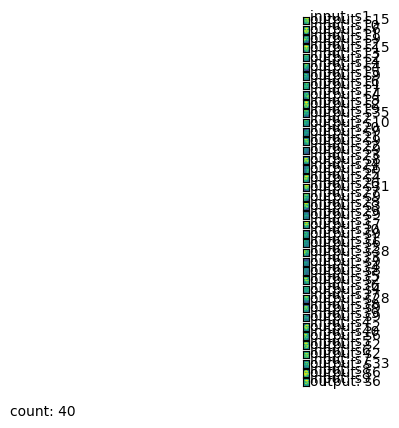

In [52]:

report = MyReport(inputData=data.inputImage, result=myAI.result)

report.report()

In [53]:

myAI = KerasClassifier(imageData=data.storedImage, inputImage=data.inputImage, learningRate=0.0001)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 716ms/step - accuracy: 0.0350 - loss: 6.4284 - val_accuracy: 0.1250 - val_loss: 6.1983
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 700ms/step - accuracy: 0.1367 - loss: 4.2522 - val_accuracy: 0.3000 - val_loss: 4.2049
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 700ms/step - accuracy: 0.4534 - loss: 3.0687 - val_accuracy: 0.4250 - val_loss: 2.9050
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 701ms/step - accuracy: 0.4867 - loss: 2.1030 - val_accuracy: 0.5750 - val_loss: 2.0186
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 700ms/step - accuracy: 0.7112 - loss: 1.5494 - val_accuracy: 0.6750 - val_loss: 1.6143
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 707ms/step - accuracy: 0.7855 - loss: 1.1960 - val_accuracy: 0.7500 - val_loss: 1.4989
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 706ms/step - accuracy: 0.8242 - loss: 0.9673 - val_accuracy: 0.7750 - val_loss: 1.2913
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 708ms/step - accuracy: 0.8954 - loss: 0.6708 - val_accuracy: 0.

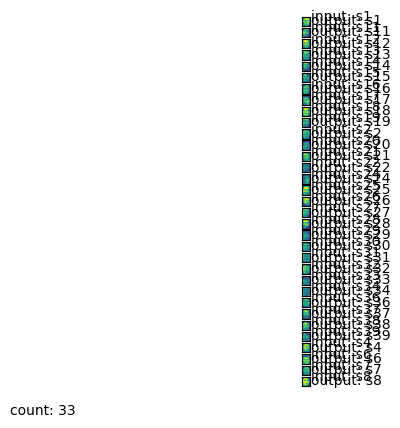

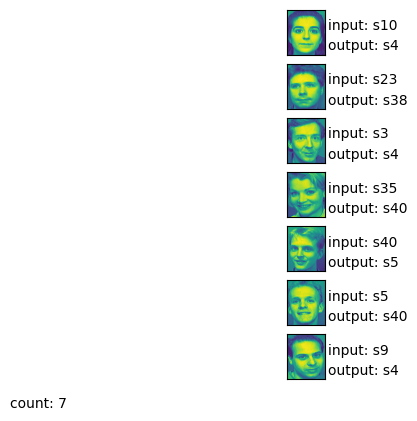

In [55]:

report = MyReport(inputData=data.inputImage, result=myAI.result)

report.report()